Make sure to change your runtime type to GPU in Runtime > Change runtime type
<br/> Now mount your Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [44]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


Clone the repository from Github to /content/gdrive/My Drive. Ignore this if this is the 2nd time you run this notebook because the source code is already on your Google Drive.

In [45]:
!git init
!git clone https://github.com/bnvien/deep-photo-styletransfer-tf.git

Reinitialized existing Git repository in /content/gdrive/My Drive/.git/
Cloning into 'deep-photo-styletransfer-tf'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 646 (delta 22), reused 82 (delta 17), pack-reused 554
Receiving objects: 100% (646/646), 179.34 MiB | 23.87 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [46]:
cd /content/gdrive/My\ Drive/deep-photo-styletransfer-tf

/content/gdrive/My Drive/deep-photo-styletransfer-tf


Download VGG19 weights. After downloading give Google Drive some time to refresh. Again, ignore this if this is the 2nd time you run this notebook.

In [47]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jp2lN8pkglXQ2ytqmhas43qs7tFxh4LU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1jp2lN8pkglXQ2ytqmhas43qs7tFxh4LU" -O vgg19/vgg19.npy && rm -rf /tmp/cookies.txt

--2020-05-02 00:50:44--  https://docs.google.com/uc?export=download&confirm=Cjip&id=1jp2lN8pkglXQ2ytqmhas43qs7tFxh4LU
Resolving docs.google.com (docs.google.com)... 172.217.14.78, 2607:f8b0:4007:80c::200e
Connecting to docs.google.com (docs.google.com)|172.217.14.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-3s-docs.googleusercontent.com/docs/securesc/u0pa96kavk4lvii8hjasd9npr5u4bis3/77u3q53b3pfi2qk3epuspma6sgm35l3i/1588380600000/01298577038062237935/08923819848898850784Z/1jp2lN8pkglXQ2ytqmhas43qs7tFxh4LU?e=download [following]
--2020-05-02 00:50:44--  https://doc-0o-3s-docs.googleusercontent.com/docs/securesc/u0pa96kavk4lvii8hjasd9npr5u4bis3/77u3q53b3pfi2qk3epuspma6sgm35l3i/1588380600000/01298577038062237935/08923819848898850784Z/1jp2lN8pkglXQ2ytqmhas43qs7tFxh4LU?e=download
Resolving doc-0o-3s-docs.googleusercontent.com (doc-0o-3s-docs.googleusercontent.com)... 216.58.217.193, 2607:f8b0:4007:808::2001
Connecting to doc-0o-

Install and setup dependencies

In [36]:
!pip install pycuda
%tensorflow_version 1.x

     |████████████████████████████████| 1.6MB 18.3MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 81kB 13.1MB/s 
  Created wheel for pycuda: filename=pycuda-2019.1.2-cp36-cp36m-linux_x86_64.whl size=4537613 sha256=3e7ca332bfdfb2ae89f2880731e8048dee74b7dd8d4ce0b6b711943ae62ed12b
  Stored in directory: /root/.cache/pip/wheels/a6/60/f0/b1c430c73d281ac3e46070480db50f7907364eb6f6d3188396
  Created wheel for pytools: filename=pytools-2020.1-py2.py3-none-any.whl size=59602 sha256=0b38c5fdc94d8249ea7ee24bb2832a410768f906058ba9aefc4dd57624ed70c3
  Stored in directory: /root/.cache/pip/wheels/6f/da/1b/946775a88291378182ed92c9800d6d0ebc2a554cb89829cc24
Successfully built pycuda pytools
TensorFlow 1.x selected.


In [40]:
!python3 deep_photostyle.py --content_image_path ./examples/input/input.jpg \
--style_image_path ./examples/style/case6.jpg \
--content_seg_path ./examples/segmentation/input_mask.jpg \
--style_seg_path ./examples/segmentation/case6_mask.jpg \
--style_option 0 \
--max_iter 2000 \
--apply_smooth False \
--init_image_path ./examples/input/input.jpg \
--style_weight 1e3

Streaming output truncated to the last 5000 lines.
	Content loss: 794694.875
	Style 1 loss: 1216.4302978515625
	Style 2 loss: 23021.205078125
	Style 3 loss: 6605.228515625
	Style 4 loss: 49802.828125
	Style 5 loss: 1425.6949462890625
	TV loss: 518945.65625
	Affine loss: 9.999999747378752e-06
	Total loss: 1395711.875
Iteration 1578 / 2000
	Content loss: 794696.8125
	Style 1 loss: 1216.2203369140625
	Style 2 loss: 23022.220703125
	Style 3 loss: 6603.89697265625
	Style 4 loss: 49788.23828125
	Style 5 loss: 1425.331298828125
	TV loss: 518939.15625
	Affine loss: 9.999999747378752e-06
	Total loss: 1395691.875
Iteration 1579 / 2000
	Content loss: 794666.0
	Style 1 loss: 1215.5977783203125
	Style 2 loss: 23020.685546875
	Style 3 loss: 6600.9248046875
	Style 4 loss: 49797.47265625
	Style 5 loss: 1425.1246337890625
	TV loss: 518930.625
	Affine loss: 9.999999747378752e-06
	Total loss: 1395656.375
Iteration 1580 / 2000
	Content loss: 794738.4375
	Style 1 loss: 1213.73583984375
	Style 2 loss: 23002

Now replace the non-working area on the output image with the non-working area on the original image.

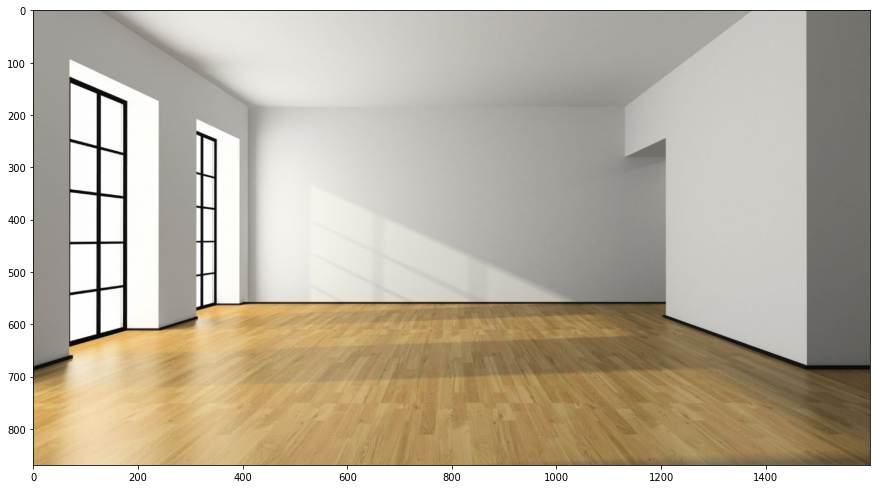

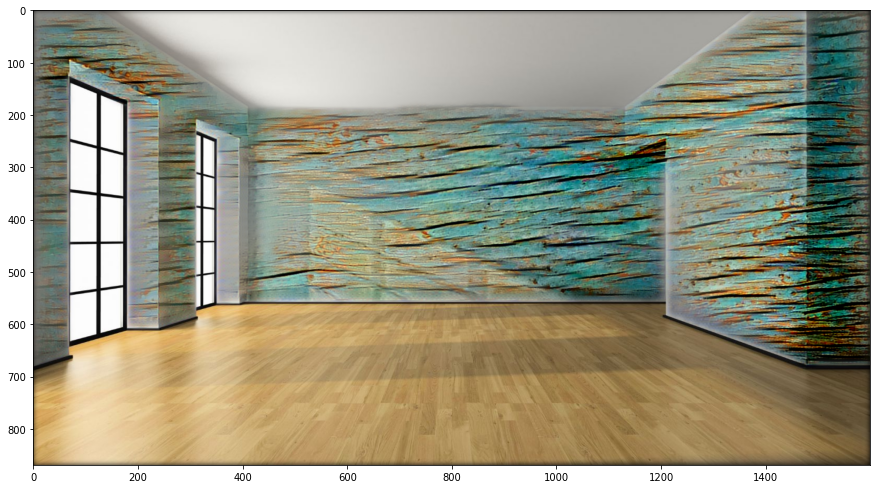

In [43]:
from replace_nonworking_area import replaceNonWorkingArea
from matplotlib import pyplot as plt
import cv2 as cv
plt.rcParams['figure.figsize'] = (15.0, 10.0) # set default size of plots

input_im = cv.imread("examples/input/input.jpg")
plt.imshow(input_im[:,:,::-1])
plt.show()

im = replaceNonWorkingArea("examples/input/input.jpg", "examples/segmentation/input_mask.jpg", "best_stylized.png", "final.png", 5)
plt.imshow(im[:,:,::-1])
plt.show()

Let's demonstrate automatic segmentation.

In [49]:
cd /content/gdrive/My\ Drive/deep-photo-styletransfer-tf/semantic-segmentation

/content/gdrive/My Drive/deep-photo-styletransfer-tf/semantic-segmentation


Run setup.sh to install the dependencies

In [65]:
!chmod +x setup.sh
!./setup.sh

  Using cached https://files.pythonhosted.org/packages/81/3b/40e876afde9f5ffa1cfdce10565aba85b0dc2e067ed551dfb566cfee6d4d/yacs-0.1.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ee/67/f403d4ae6e9cd74b546ee88cccdb29b8415a9c1b3d80aebeb20c9ea91d96/pytorch-1.0.2.tar.gz
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-288zhbwx/pytorch/setup.py'"'"'; __file__='"'"'/tmp/pip-install-288zhbwx/pytorch/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-y7097f8q/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [70]:
!python3 -u test.py --imgs img/case3.jpg \
--cfg config/ade20k-resnet50dilated-ppm_deepsup.yaml \
DIR ade20k-resnet50dilated-ppm_deepsup \
TEST.result img \
TEST.checkpoint epoch_20.pth \

[2020-05-02 01:28:51,199 INFO test.py line 174 3403] Loaded configuration file config/ade20k-resnet50dilated-ppm_deepsup.yaml
[2020-05-02 01:28:51,199 INFO test.py line 175 3403] Running with config:
DATASET:
  imgMaxSize: 1000
  imgSizes: (300, 375, 450, 525, 600)
  list_train: ./data/training.odgt
  list_val: ./data/validation.odgt
  num_class: 150
  padding_constant: 8
  random_flip: True
  root_dataset: ./data/
  segm_downsampling_rate: 8
DIR: ade20k-resnet50dilated-ppm_deepsup
MODEL:
  arch_decoder: ppm_deepsup
  arch_encoder: resnet50dilated
  fc_dim: 2048
  weights_decoder: 
  weights_encoder: 
TEST:
  batch_size: 1
  checkpoint: epoch_20.pth
  result: img
TRAIN:
  batch_size_per_gpu: 2
  beta1: 0.9
  deep_sup_scale: 0.4
  disp_iter: 20
  epoch_iters: 5000
  fix_bn: False
  lr_decoder: 0.02
  lr_encoder: 0.02
  lr_pow: 0.9
  num_epoch: 20
  optim: SGD
  seed: 304
  start_epoch: 0
  weight_decay: 0.0001
  workers: 16
VAL:
  batch_size: 1
  checkpoint: epoch_20.pth
  visualize: Fa

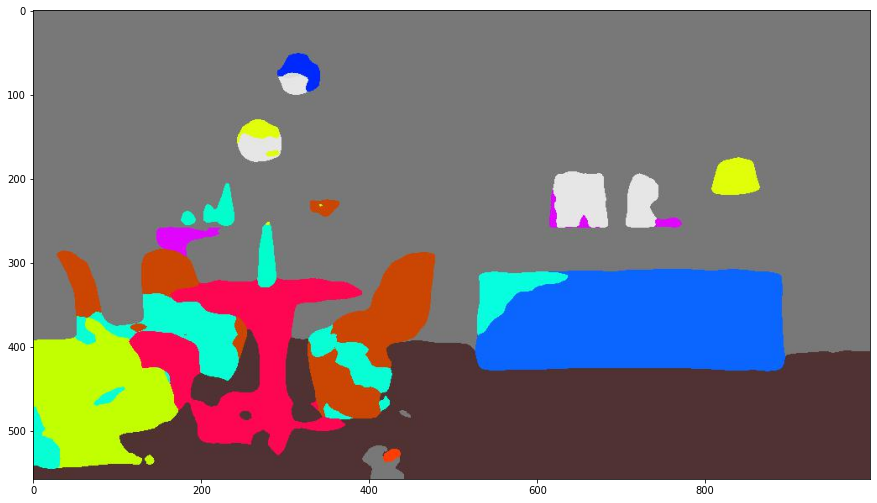

In [71]:
mask = cv.imread("img/case3_mask.jpg")
plt.imshow(mask[:,:,::-1])
plt.show()